In [2]:

# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import missingno as msno  # Para visualizar datos faltantes
import geopandas as gpd  # Para análisis geoespacial

# Configuraciones para visualización
#plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Configurar opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 200)

In [3]:
# =============================================================================
# 1. CARGA DE DATOS
# =============================================================================

# Cargar los conjuntos de datos
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f"Dimensiones del conjunto de entrenamiento: {train_data.shape}")
print(f"Dimensiones del conjunto de prueba: {test_data.shape}")

# Verificar las primeras filas del conjunto de entrenamiento
print("\nPrimeras filas del conjunto de entrenamiento:")
train_data.head()

Dimensiones del conjunto de entrenamiento: (20000, 20)
Dimensiones del conjunto de prueba: (10000, 20)

Primeras filas del conjunto de entrenamiento:


id  superficie_interior_m2  superficie_exterior_m2  numero_habitacions  numero_banos  ano_construccion  lonxitude  latitude  temperatura_media_mes_construccion tipo_edificacion  \
0  25521                   44.96                    0.00                   1             2              1947      -8.17     43.20                               24.75      Apartamento   
1   4843                   93.55                   87.26                   2             2              1977      -7.23     43.60                               14.06      Apartamento   
2  27734                  273.64                  187.29                   1             1              1996      -8.40     42.25                               12.27   Chalet adosado   
3  22142                  171.82                   54.89                   4             2              1996      -6.81     43.15                               11.61   Chalet adosado   
4  14748                     NaN                 2153.49                   1             1              1990      -8.76     42.92                               10.04             Casa   

  calidade_materiais cor_favorita_propietario  distancia_centro_km  distancia_escola_km  indice_criminalidade acceso_transporte_publico orientacion eficiencia_enerxetica  numero_arboles_xardin  \
0              Media                     Azul                23.68                 2.75                  0.35                        Bo       Norte                     C                      0   
1               Alta                    Verde                  NaN                16.67                  0.44                        Bo        Este                     C                      0   
2              Media                   Branco                29.44                18.96                  0.47                   Regular        Este                     C                     10   
3               Alta                 Vermello                53.31                 1.96                  0.35                        Bo        Este                     G                      3   
4              Baixa                    Verde                70.20                 4.72                  0.09                        Bo       Oeste                     G                     12   

   prezo_euros  
0        51938  
1        76891  
2       261441  
3       247821  
4       400645

In [4]:
# =============================================================================
# 2. EXPLORACIÓN INICIAL
# =============================================================================

# Información general sobre los tipos de datos
print("\nTipos de datos en el conjunto de entrenamiento:")
train_data.info()

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
train_data.describe()

# Estadísticas descriptivas para variables categóricas
print("\nEstadísticas descriptivas para variables categóricas:")
train_data.describe(include=['object'])


Tipos de datos en el conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  20000 non-null  int64  
 1   superficie_interior_m2              18993 non-null  float64
 2   superficie_exterior_m2              18973 non-null  float64
 3   numero_habitacions                  20000 non-null  int64  
 4   numero_banos                        20000 non-null  int64  
 5   ano_construccion                    20000 non-null  int64  
 6   lonxitude                           20000 non-null  float64
 7   latitude                            20000 non-null  float64
 8   temperatura_media_mes_construccion  20000 non-null  float64
 9   tipo_edificacion                    20000 non-null  object 
 10  calidade_materiais                  20000 non-null  objec

tipo_edificacion calidade_materiais cor_favorita_propietario acceso_transporte_publico orientacion eficiencia_enerxetica
count             20000              20000                    20000                     20000       20000                 20000
unique                3                  3                        6                         3           4                     7
top         Apartamento              Media                    Verde                        Bo       Norte                     C
freq               9873               9920                     3374                     11825        5040                  4013


Análisis de valores faltantes:
                        Missing Values  Percent Missing
superficie_exterior_m2            1027             5.13
distancia_escola_km               1021             5.10
distancia_centro_km               1011             5.05
superficie_interior_m2            1007             5.04
indice_criminalidade               988             4.94


/mnt/netapp2/Store_uni/home/usc/ci/avs/personal/aprendizaje/p4/venvP4/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 1200x600 with 0 Axes>

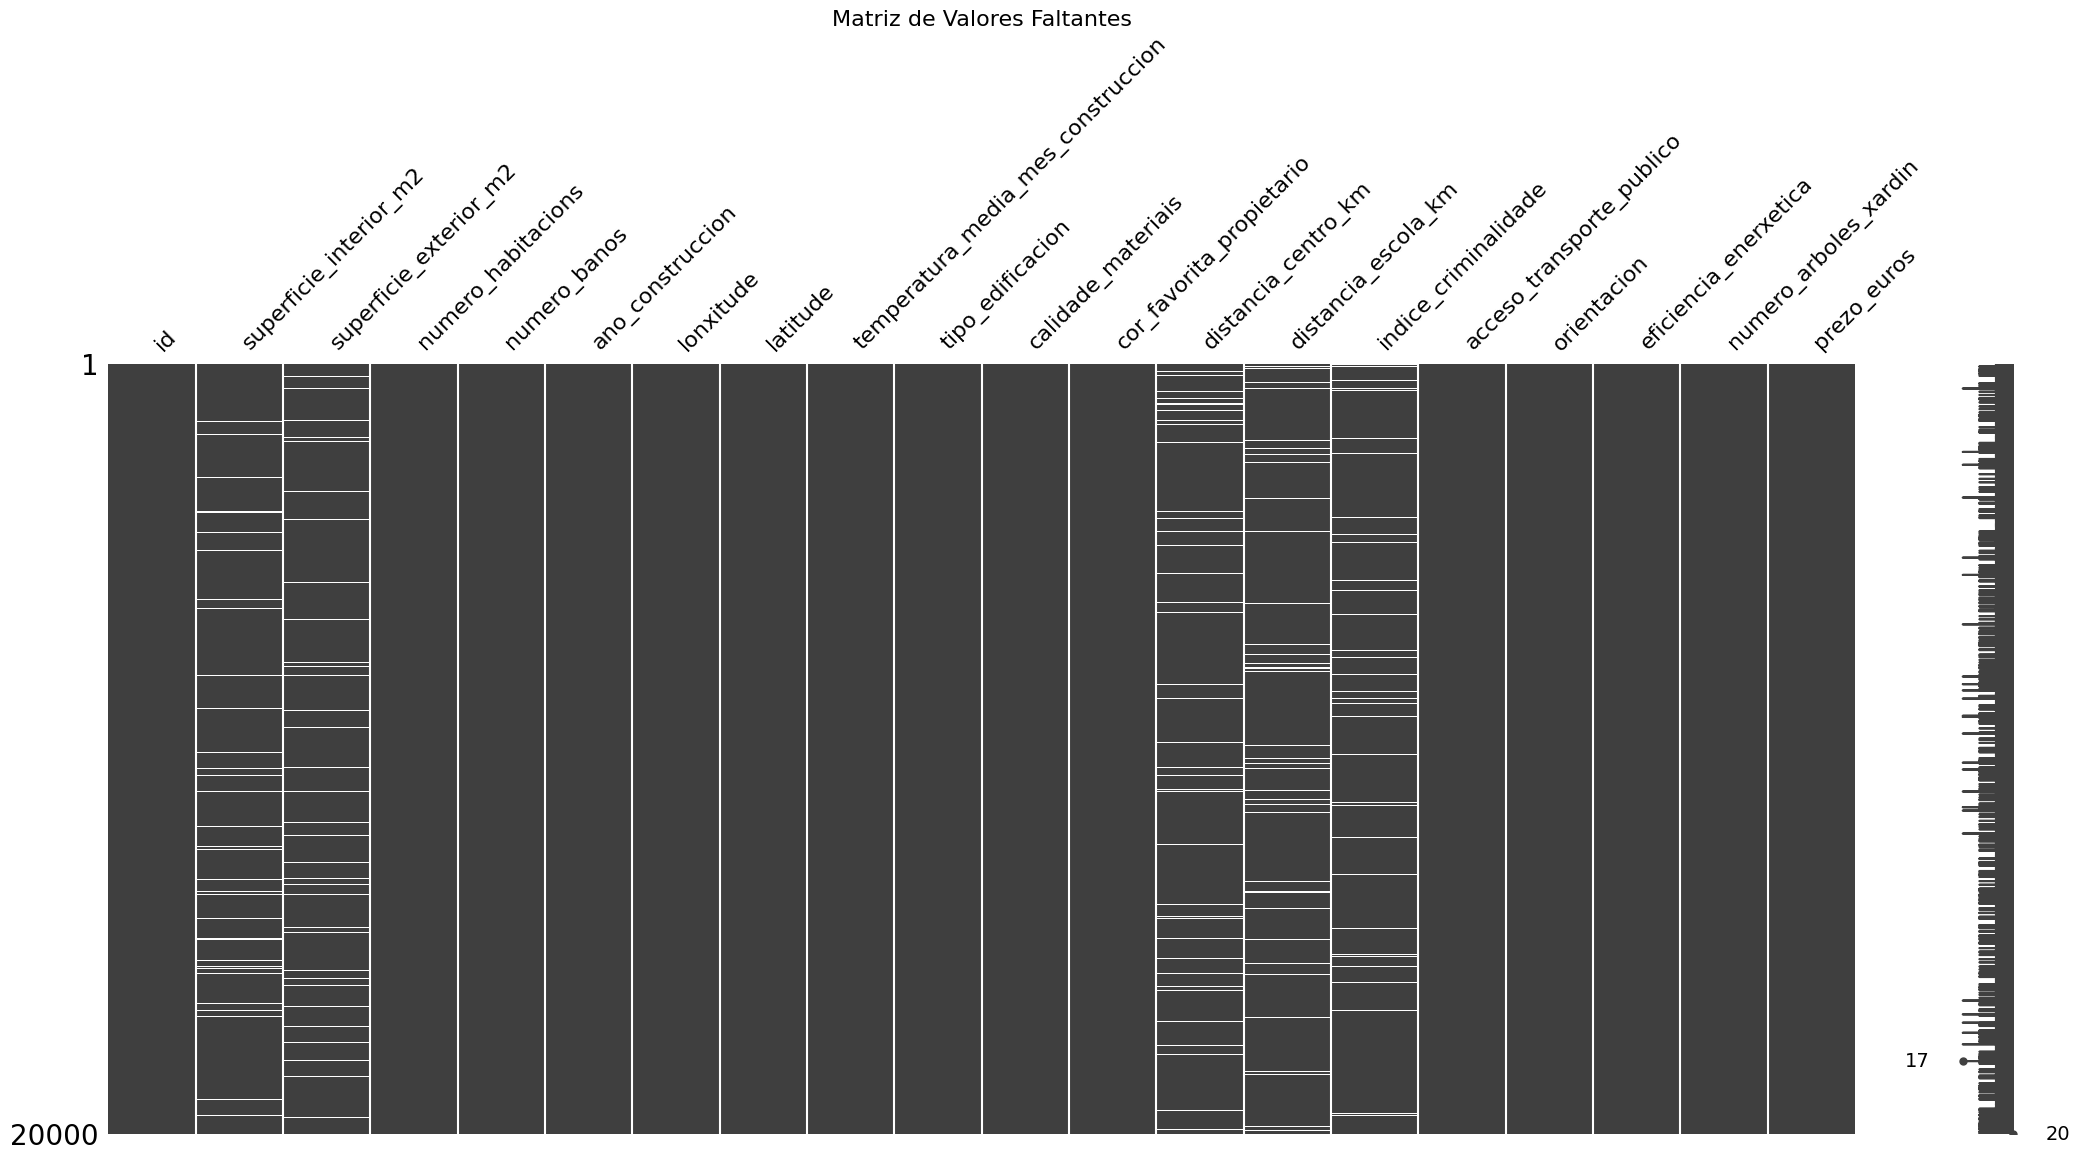

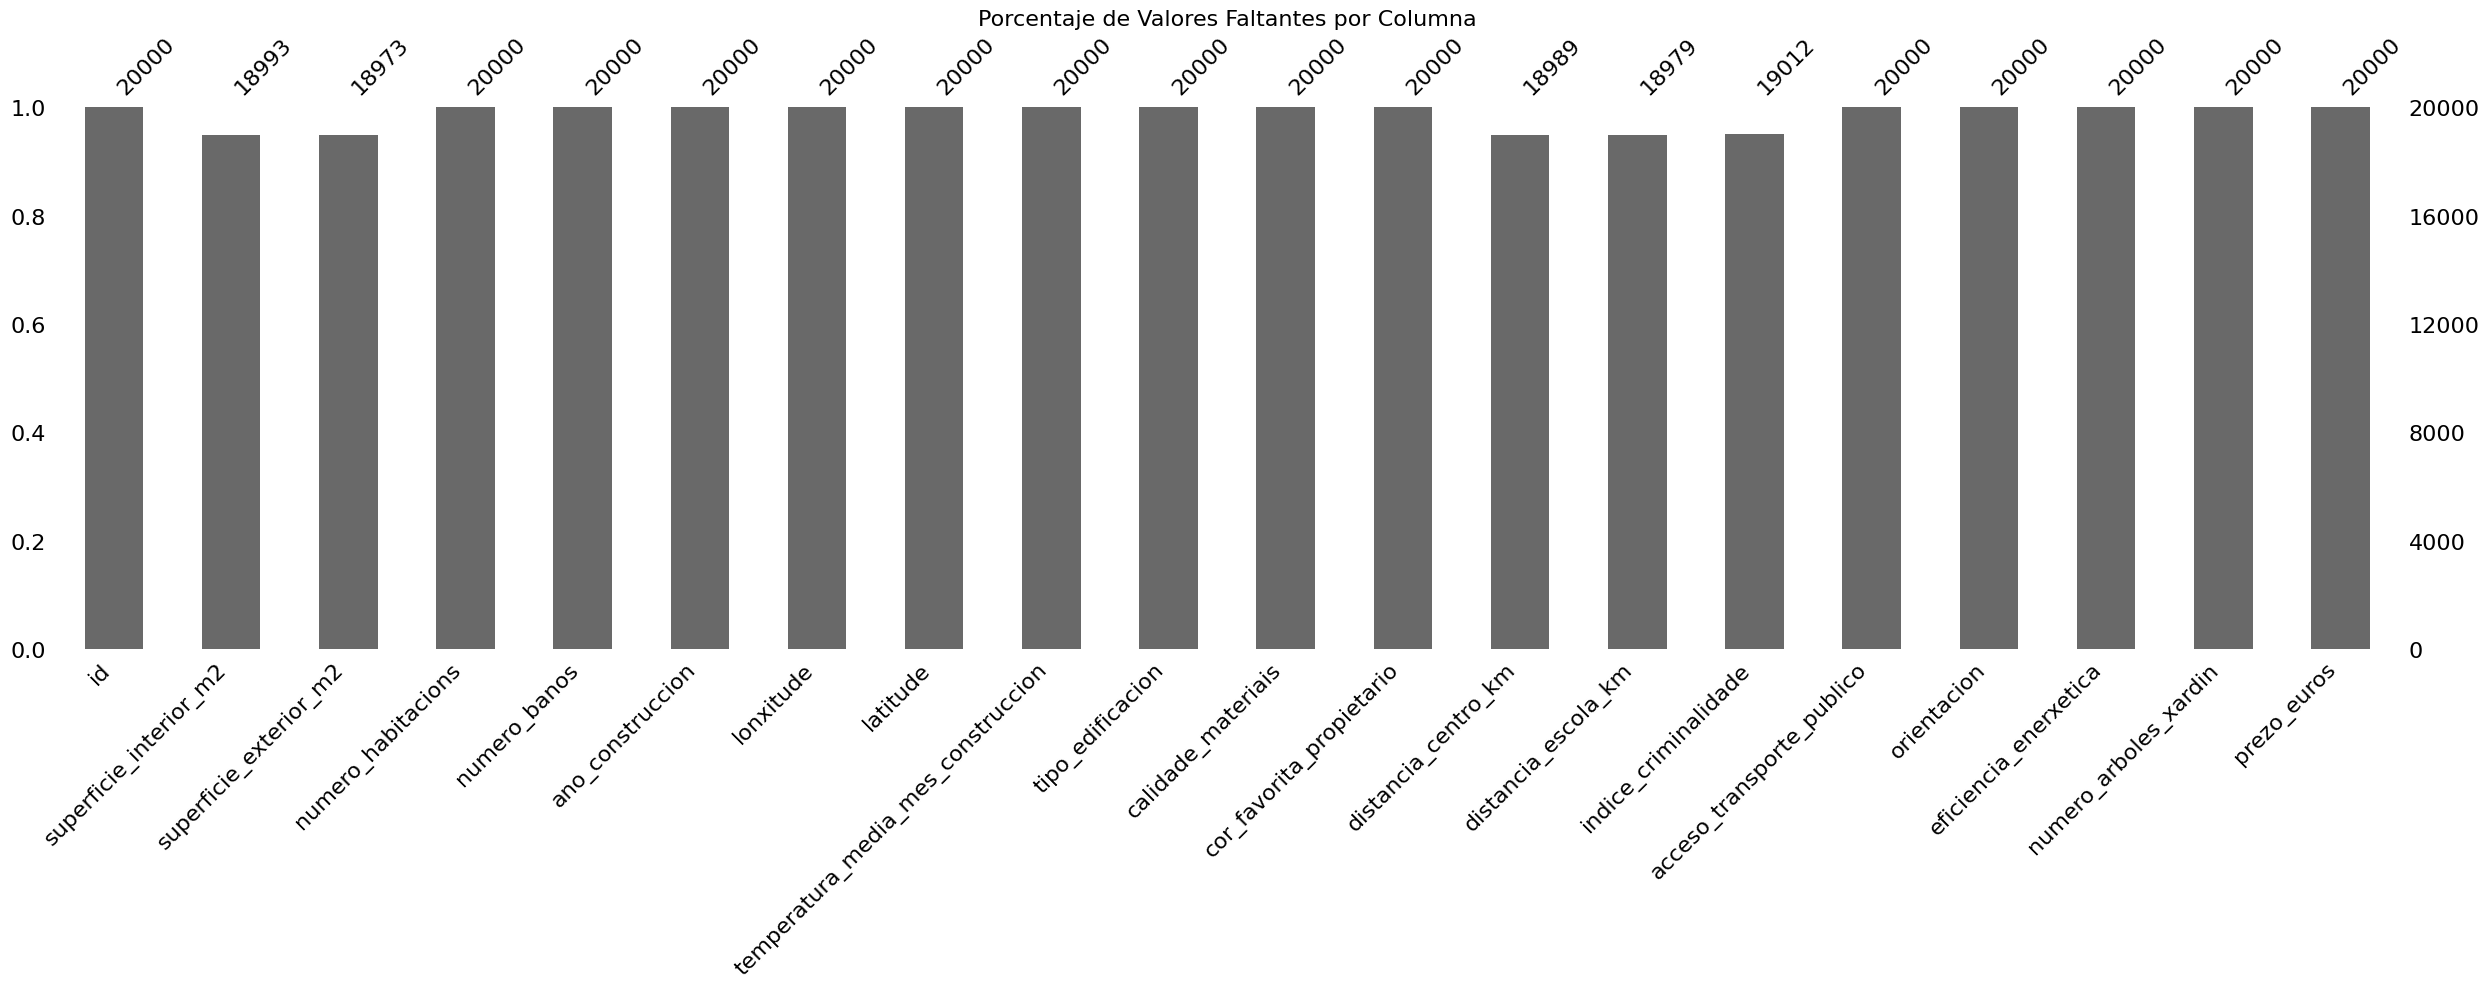

<Figure size 1400x1000 with 0 Axes>

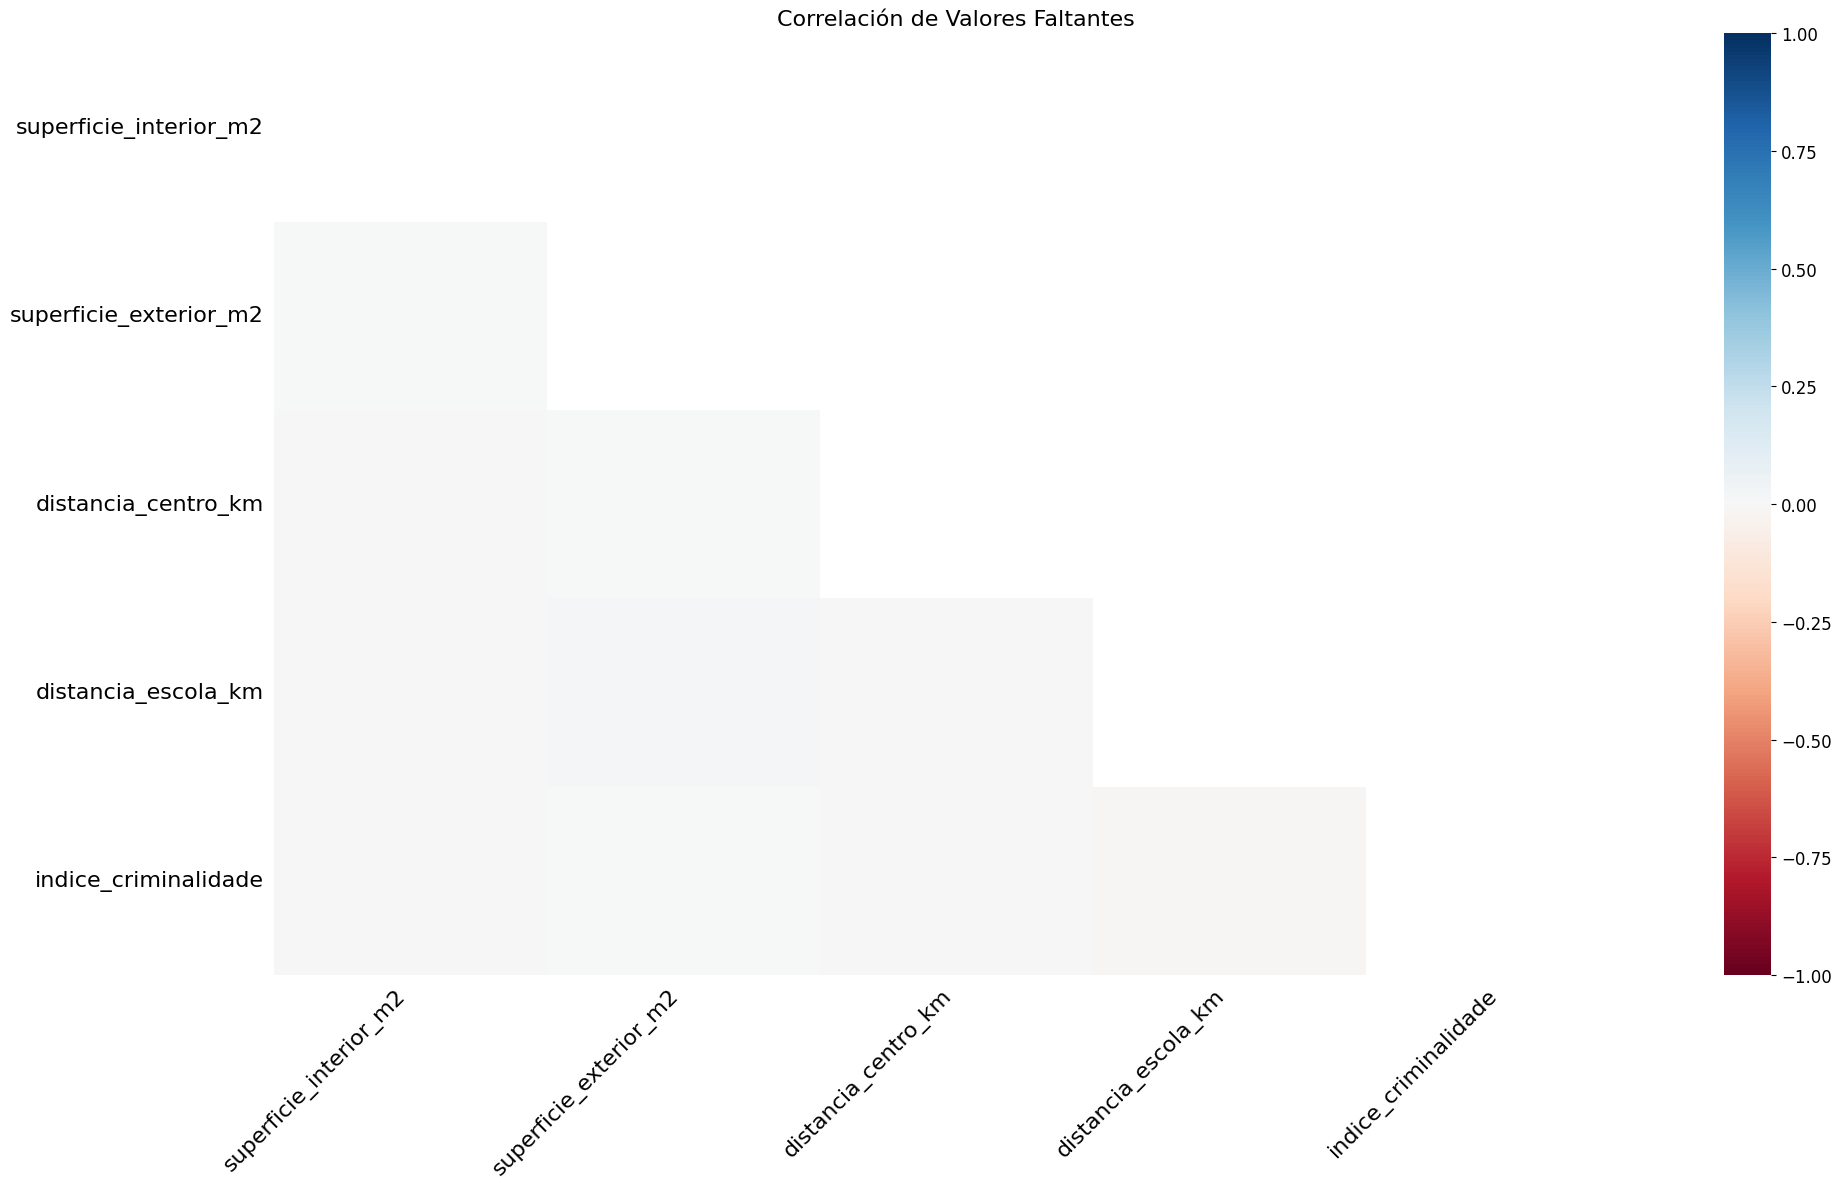

In [5]:
# =============================================================================
# 3. ANÁLISIS DE VALORES FALTANTES
# =============================================================================

# Calcular la cantidad de valores faltantes por columna
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_percent = (train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({'Missing Values': missing_values, 
                          'Percent Missing': missing_percent})
print("\nAnálisis de valores faltantes:")
print(missing_df[missing_df['Missing Values'] > 0])

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
msno.matrix(train_data)
plt.title('Matriz de Valores Faltantes', fontsize=16)
plt.tight_layout()
plt.savefig('missing_values_matrix.png')
plt.show()

# Gráfico de barras para valores faltantes
plt.figure(figsize=(12, 6))
msno.bar(train_data)
plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=16)
plt.tight_layout()
plt.savefig('missing_values_bar.png')
plt.show()

# Matriz de correlación de valores faltantes
plt.figure(figsize=(14, 10))
msno.heatmap(train_data)
plt.title('Correlación de Valores Faltantes', fontsize=16)
plt.tight_layout()
plt.savefig('missing_values_correlation.png')
plt.show()

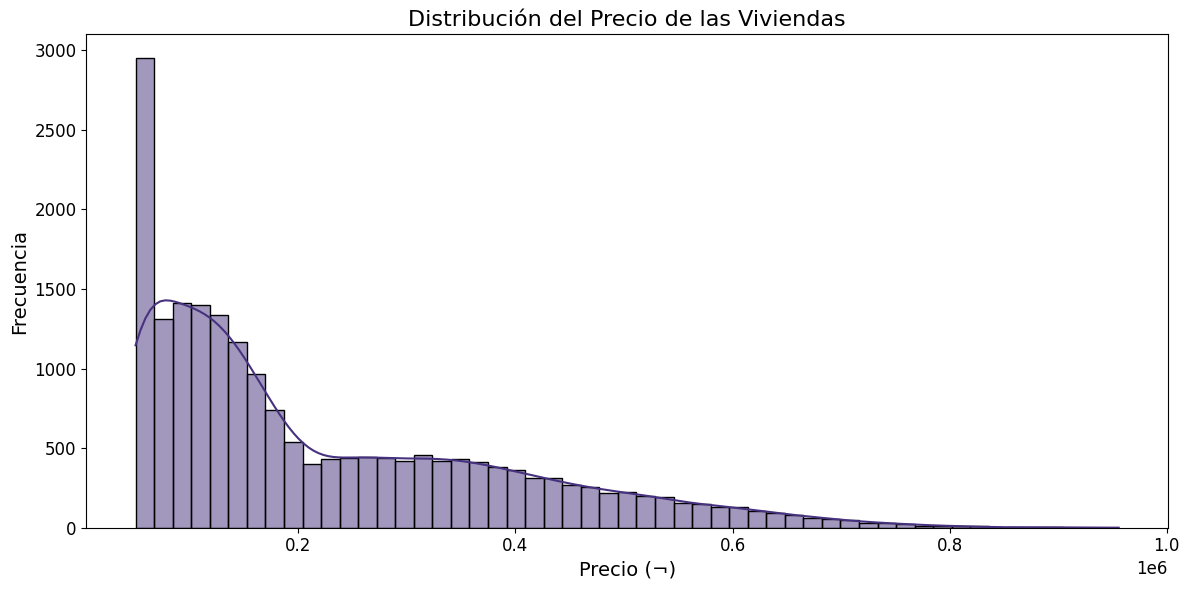

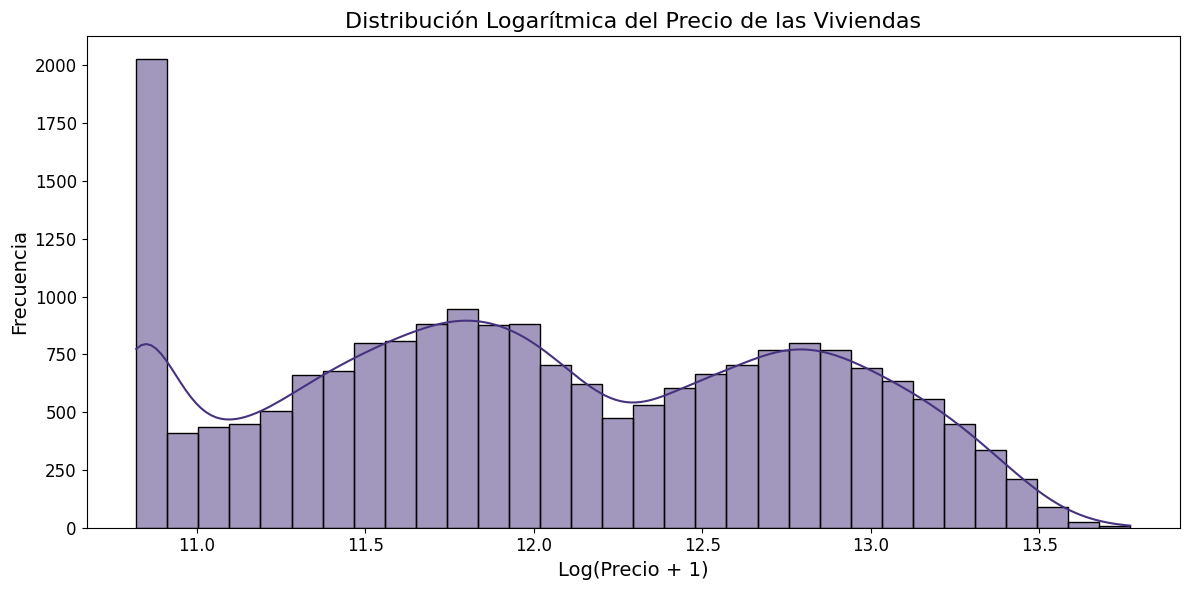


Estadísticas de la variable objetivo (prezo_euros):
count    20000.00
mean    223402.81
std     166395.70
min      50000.00
25%      93345.75
50%     159407.50
75%     329635.00
max     955855.00
Name: prezo_euros, dtype: float64


In [6]:
# =============================================================================
# 4. ANÁLISIS DE LA VARIABLE OBJETIVO
# =============================================================================

# Distribución del precio
plt.figure(figsize=(12, 6))
sns.histplot(train_data['prezo_euros'], kde=True)
plt.title('Distribución del Precio de las Viviendas', fontsize=16)
plt.xlabel('Precio (¬)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.savefig('precio_distribucion.png')
plt.show()

# Transformación logarítmica del precio (común en precios de viviendas)
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(train_data['prezo_euros']), kde=True)
plt.title('Distribución Logarítmica del Precio de las Viviendas', fontsize=16)
plt.xlabel('Log(Precio + 1)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.savefig('precio_log_distribucion.png')
plt.show()

# Estadísticas básicas del precio
precio_stats = train_data['prezo_euros'].describe()
print("\nEstadísticas de la variable objetivo (prezo_euros):")
print(precio_stats)

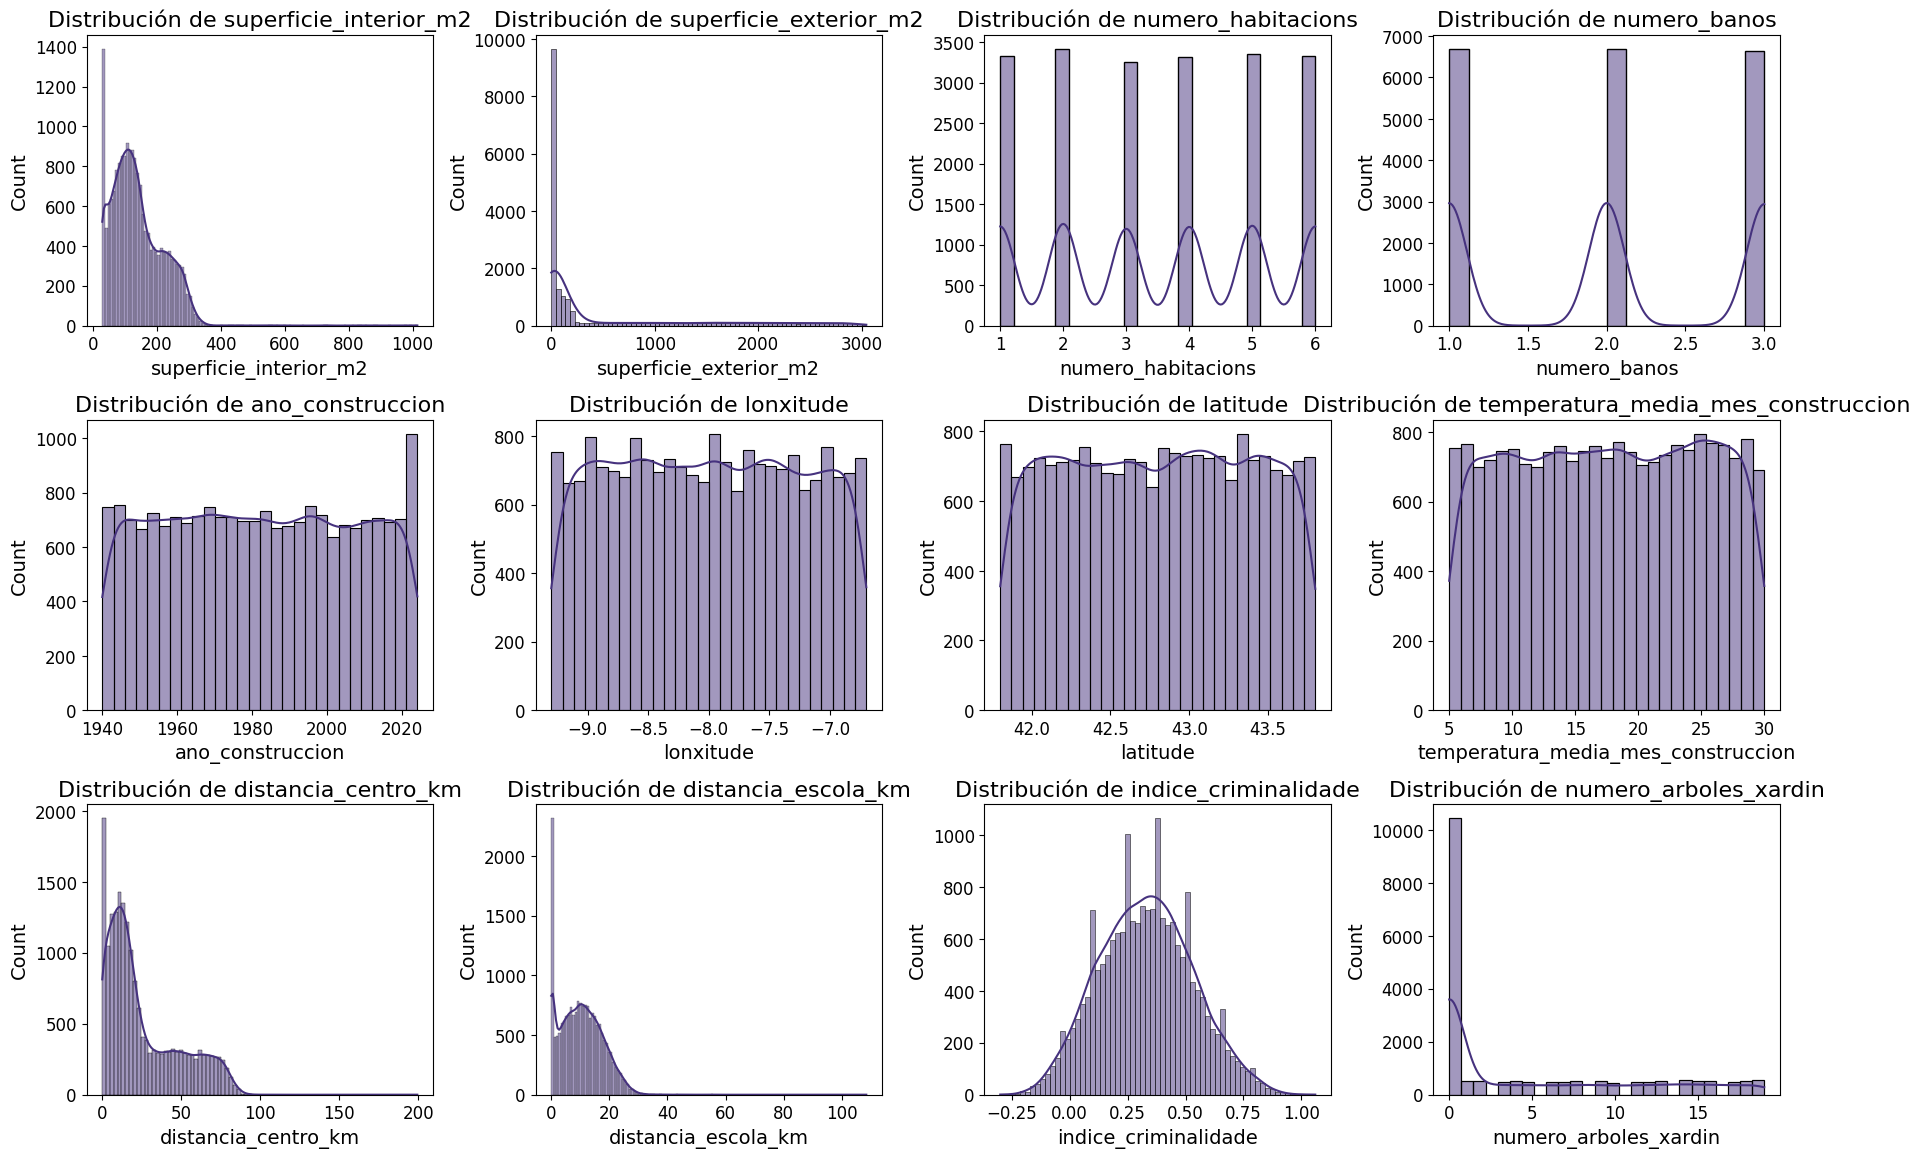

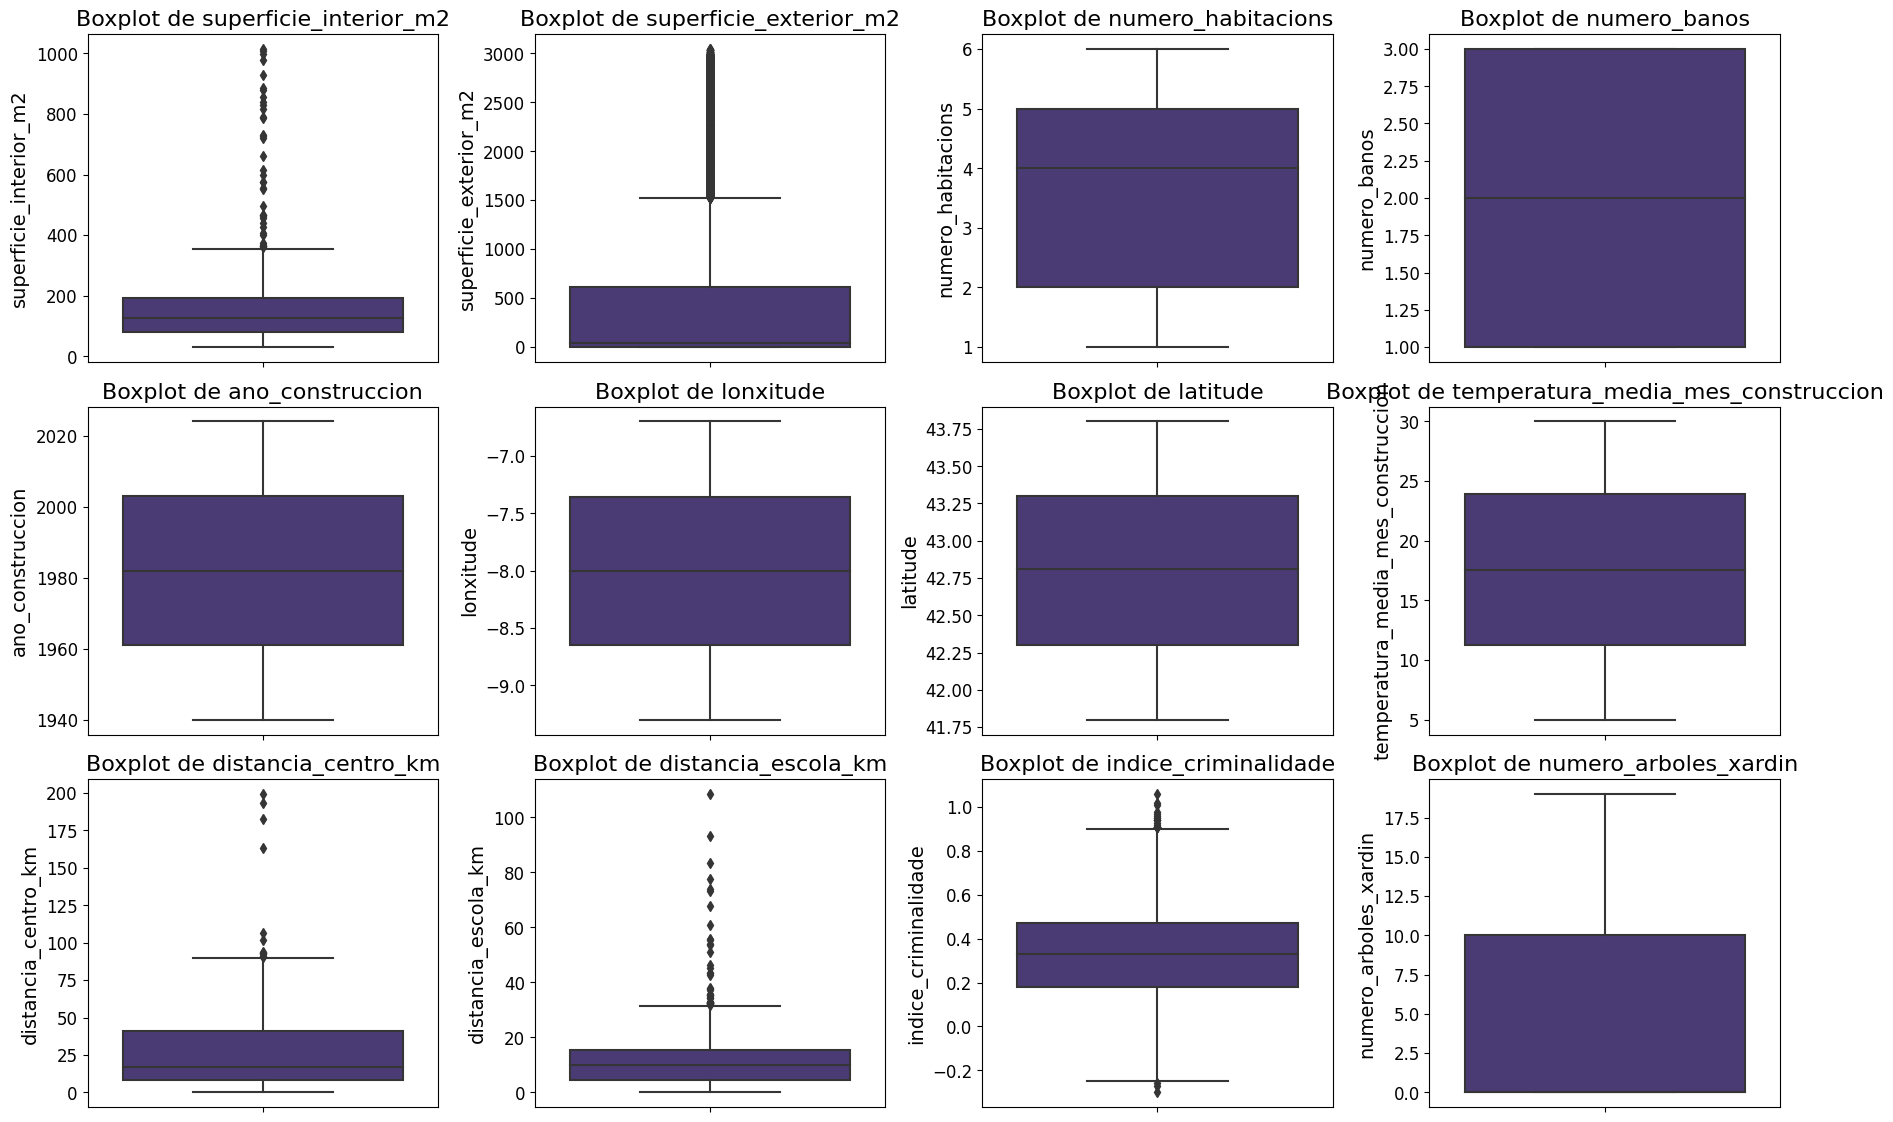

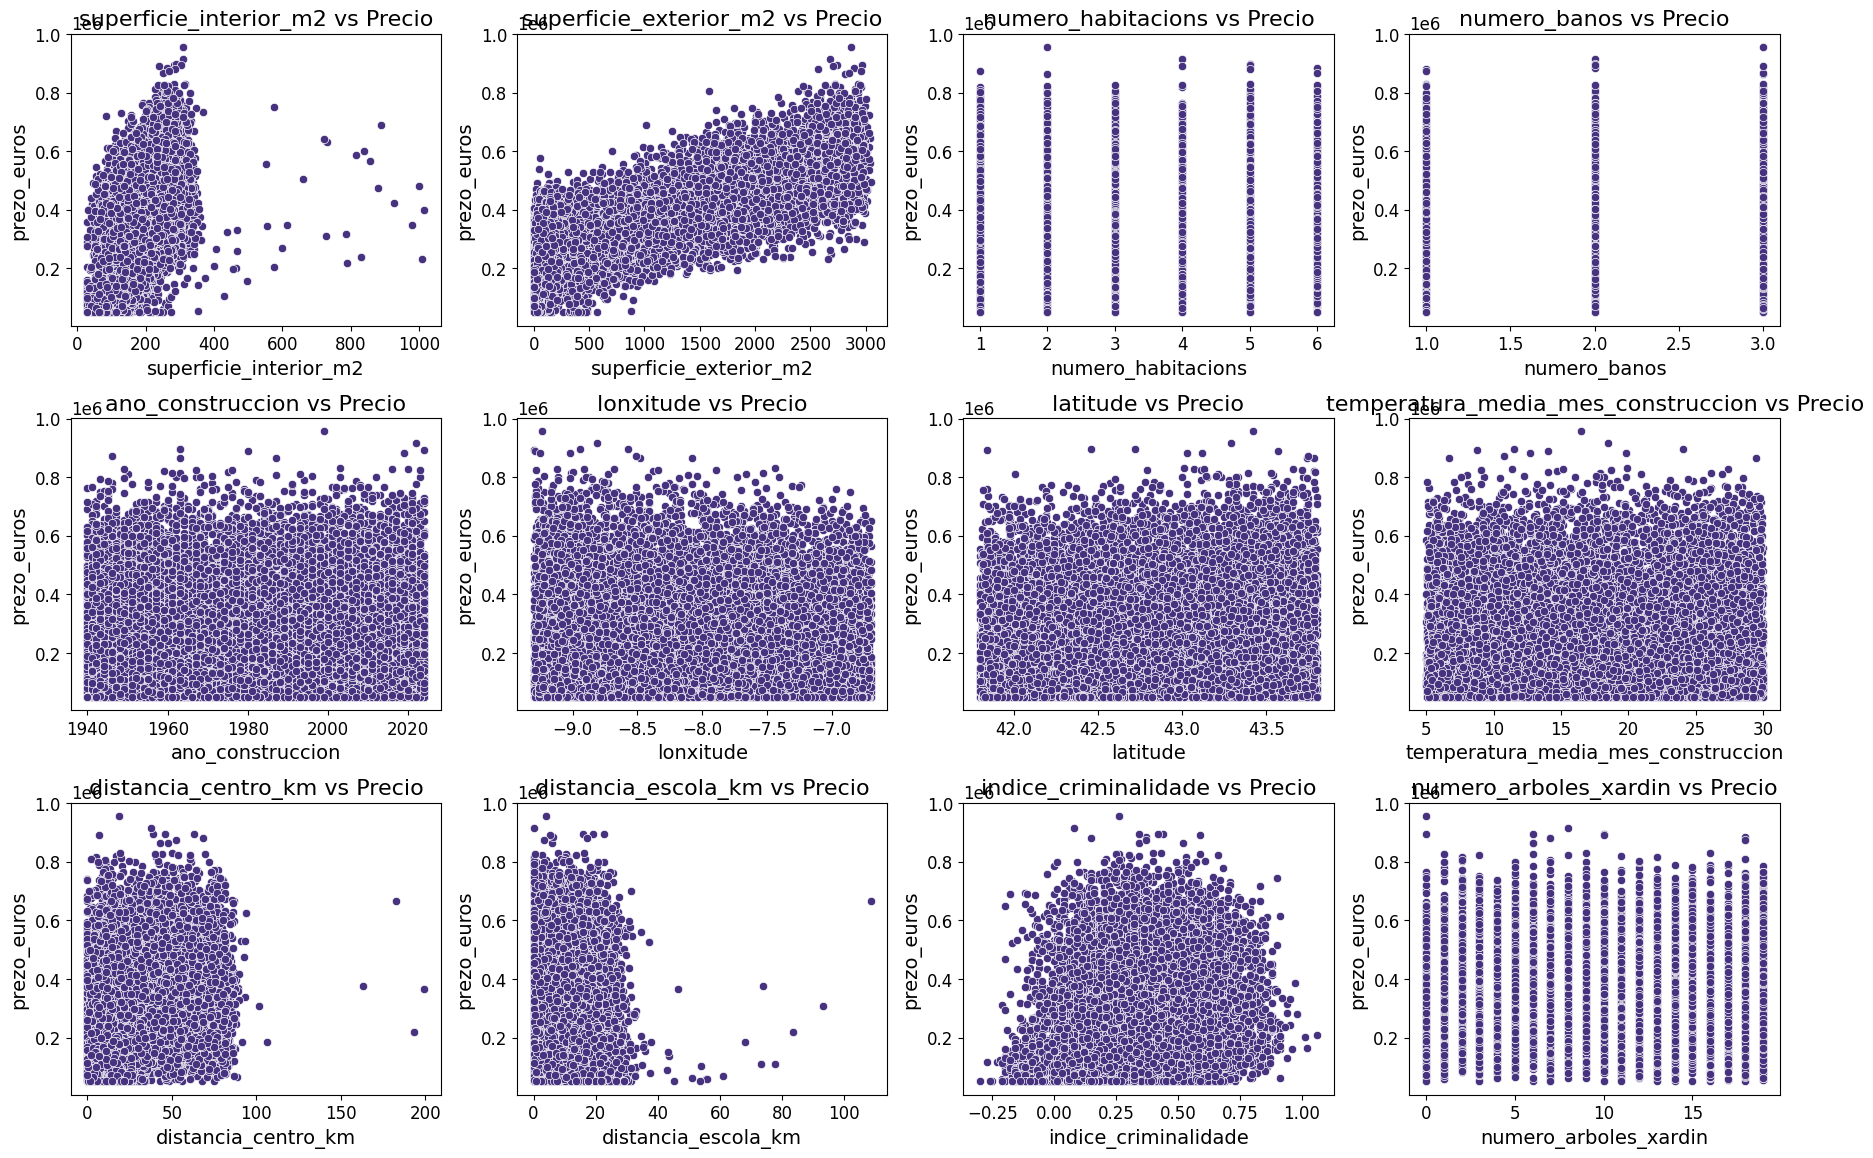

In [7]:
# =============================================================================
# 5. ANÁLISIS DE VARIABLES NUMÉRICAS
# =============================================================================

# Identificar variables numéricas (excluyendo el ID y la variable objetivo)
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [f for f in numeric_features if f not in ['id', 'prezo_euros']]

# Histogramas para variables numéricas
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribución de {feature}')
    plt.tight_layout()
plt.savefig('numeric_features_distribution.png')
plt.show()

# Boxplots para variables numéricas
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=train_data[feature])
    plt.title(f'Boxplot de {feature}')
    plt.tight_layout()
plt.savefig('numeric_features_boxplot.png')
plt.show()

# Scatter plots con la variable objetivo
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=train_data[feature], y=train_data['prezo_euros'])
    plt.title(f'{feature} vs Precio')
    plt.tight_layout()
plt.savefig('numeric_features_vs_precio.png')
plt.show()

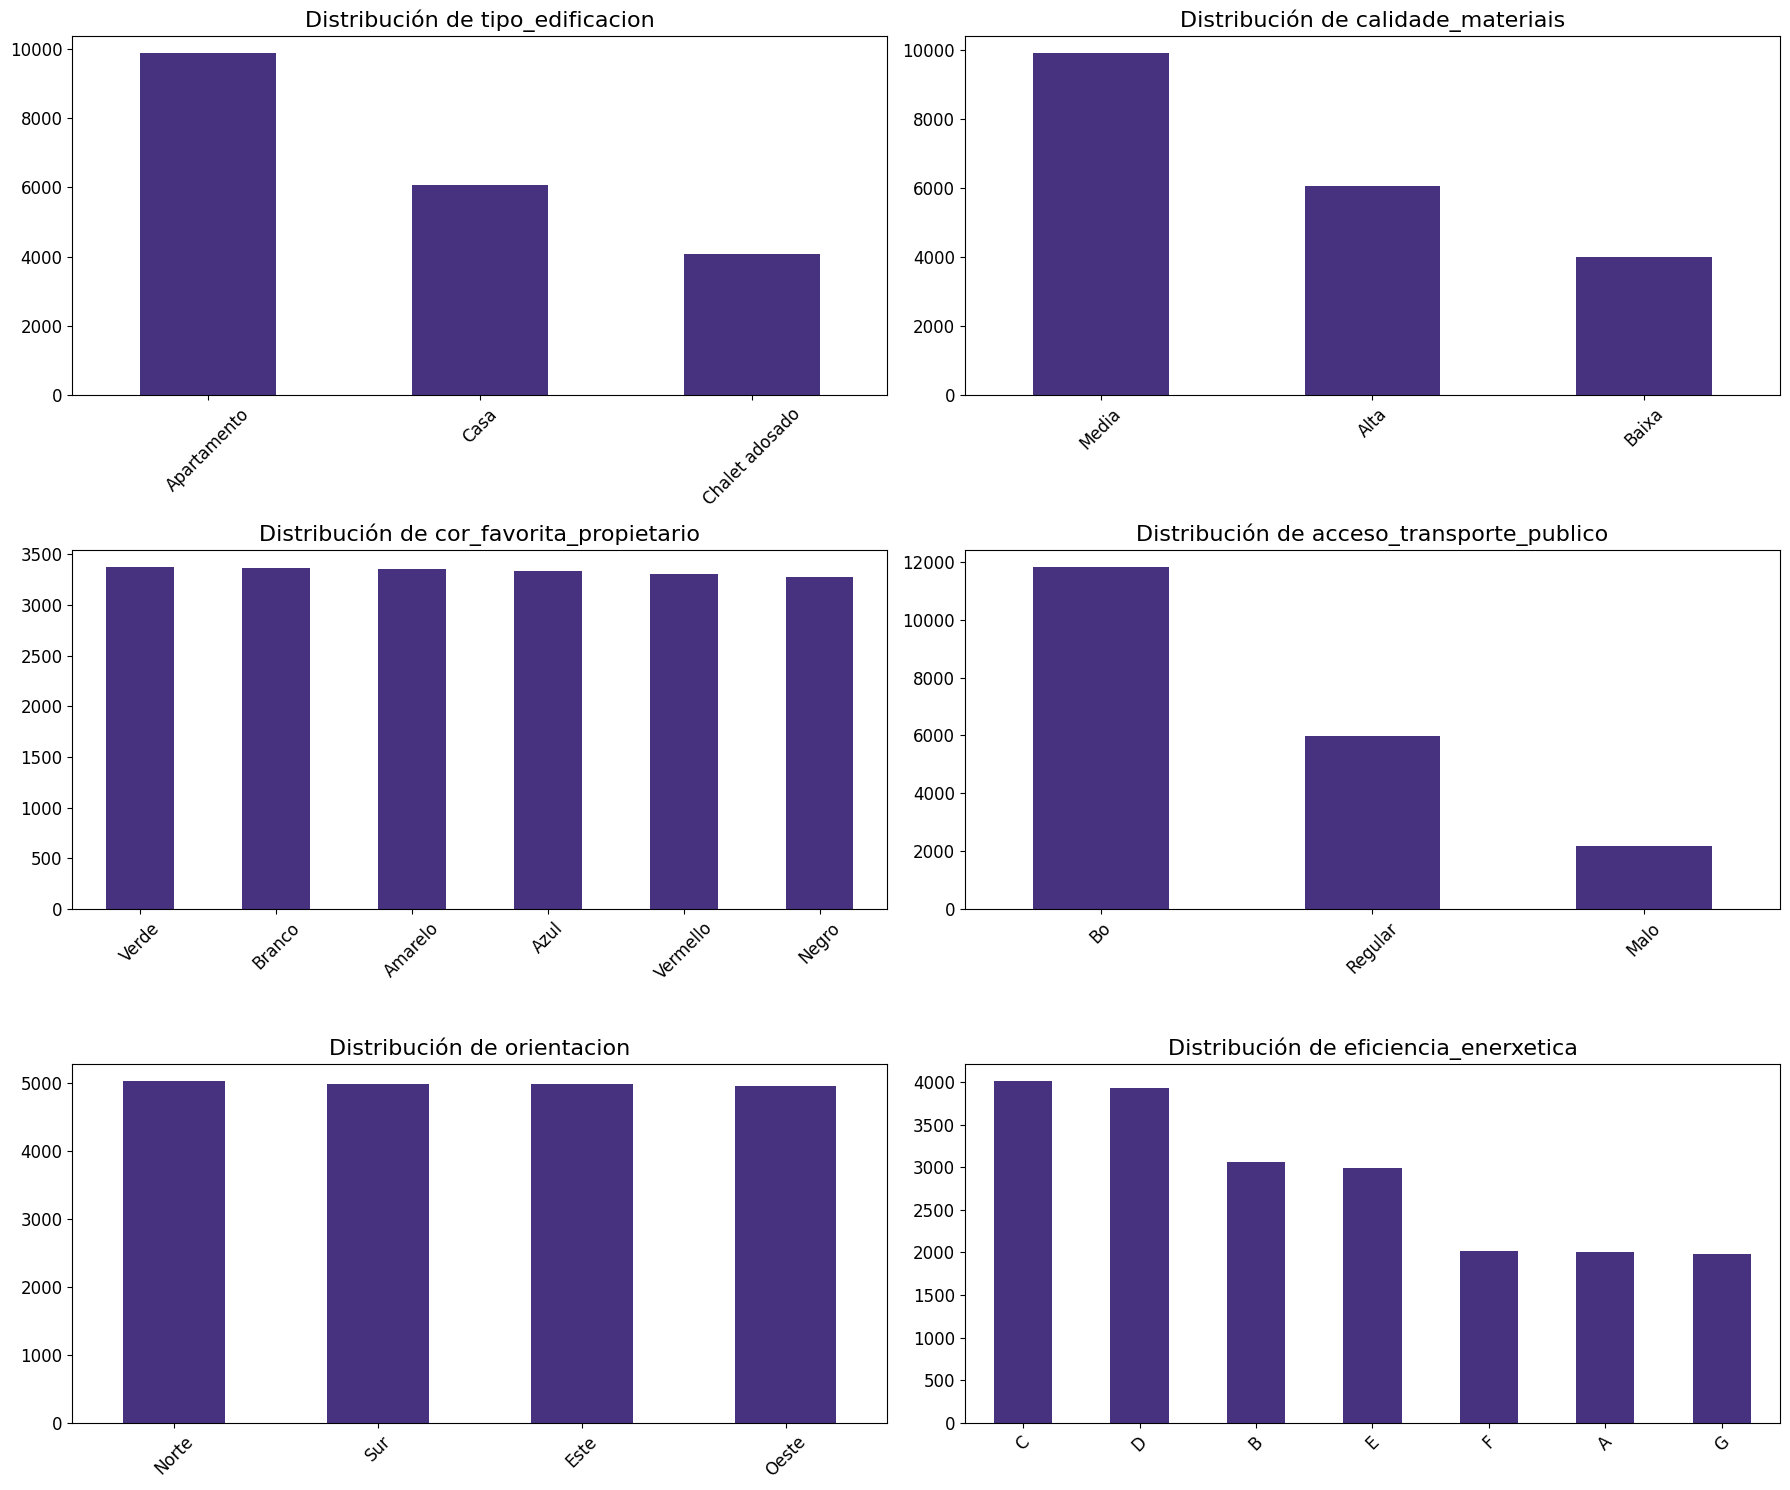

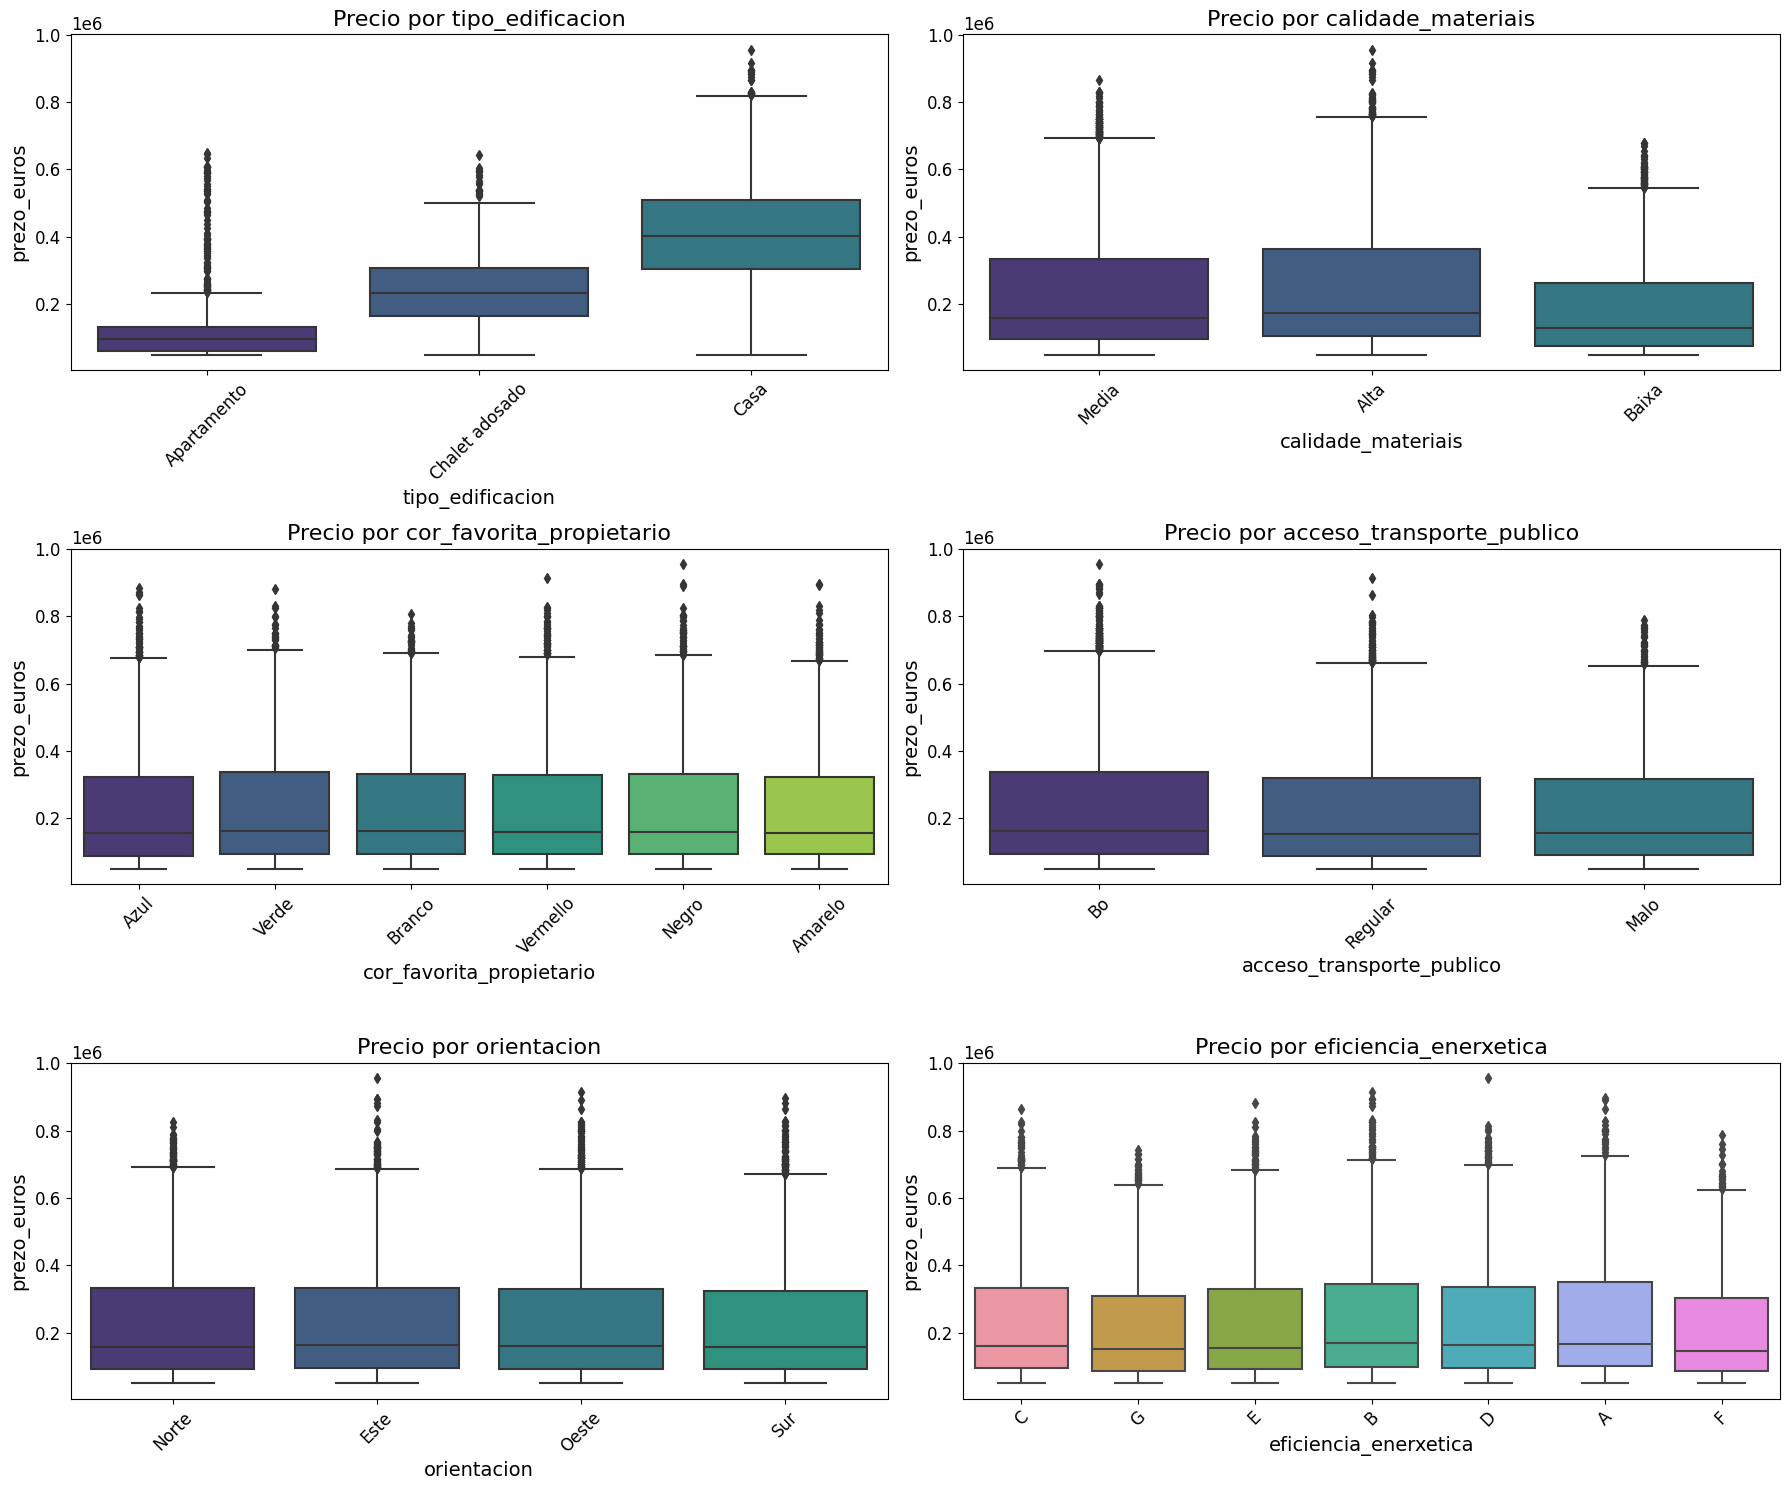

In [8]:
# =============================================================================
# 6. ANÁLISIS DE VARIABLES CATEGÓRICAS
# =============================================================================

# Identificar variables categóricas
categorical_features = train_data.select_dtypes(include=['object']).columns

# Bar plots para variables categóricas
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    train_data[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.savefig('categorical_features_distribution.png')
plt.show()

# Boxplots de precio por categoría
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=train_data[feature], y=train_data['prezo_euros'])
    plt.title(f'Precio por {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.savefig('precio_vs_categorical_features.png')
plt.show()

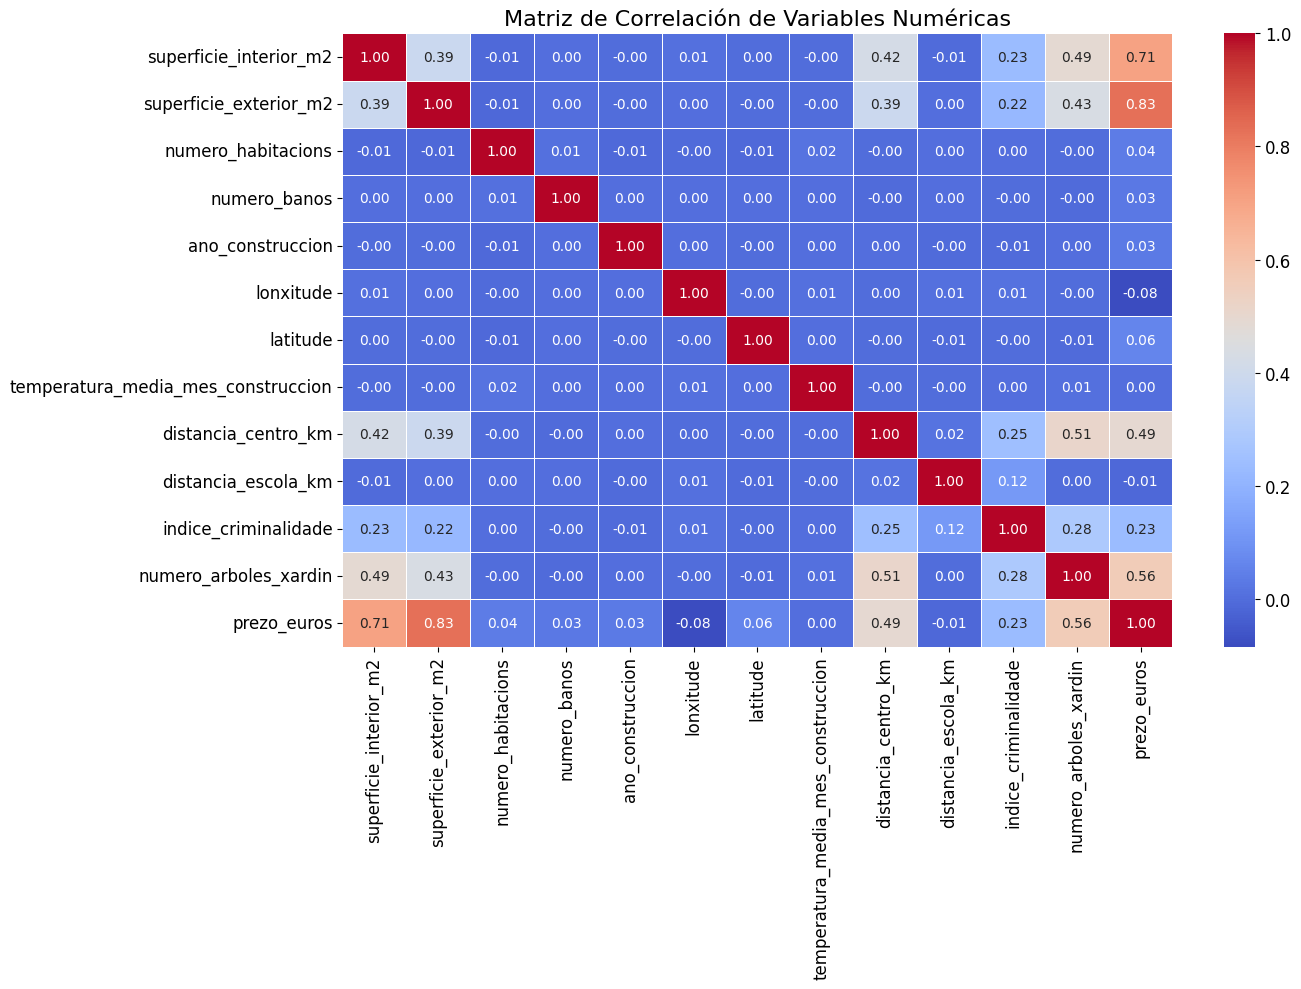


Correlaciones con la variable objetivo (prezo_euros):
prezo_euros                           1.00
superficie_exterior_m2                0.83
superficie_interior_m2                0.71
numero_arboles_xardin                 0.56
distancia_centro_km                   0.49
indice_criminalidade                  0.23
latitude                              0.06
numero_habitacions                    0.04
ano_construccion                      0.03
numero_banos                          0.03
temperatura_media_mes_construccion    0.00
distancia_escola_km                  -0.01
lonxitude                            -0.08
Name: prezo_euros, dtype: float64


In [9]:
# =============================================================================
# 7. MATRIZ DE CORRELACIÓN
# =============================================================================

# Calcular matriz de correlación para variables numéricas
correlation_matrix = train_data[numeric_features + ['prezo_euros']].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

# Top correlaciones con la variable objetivo
precio_correlations = correlation_matrix['prezo_euros'].sort_values(ascending=False)
print("\nCorrelaciones con la variable objetivo (prezo_euros):")
print(precio_correlations)

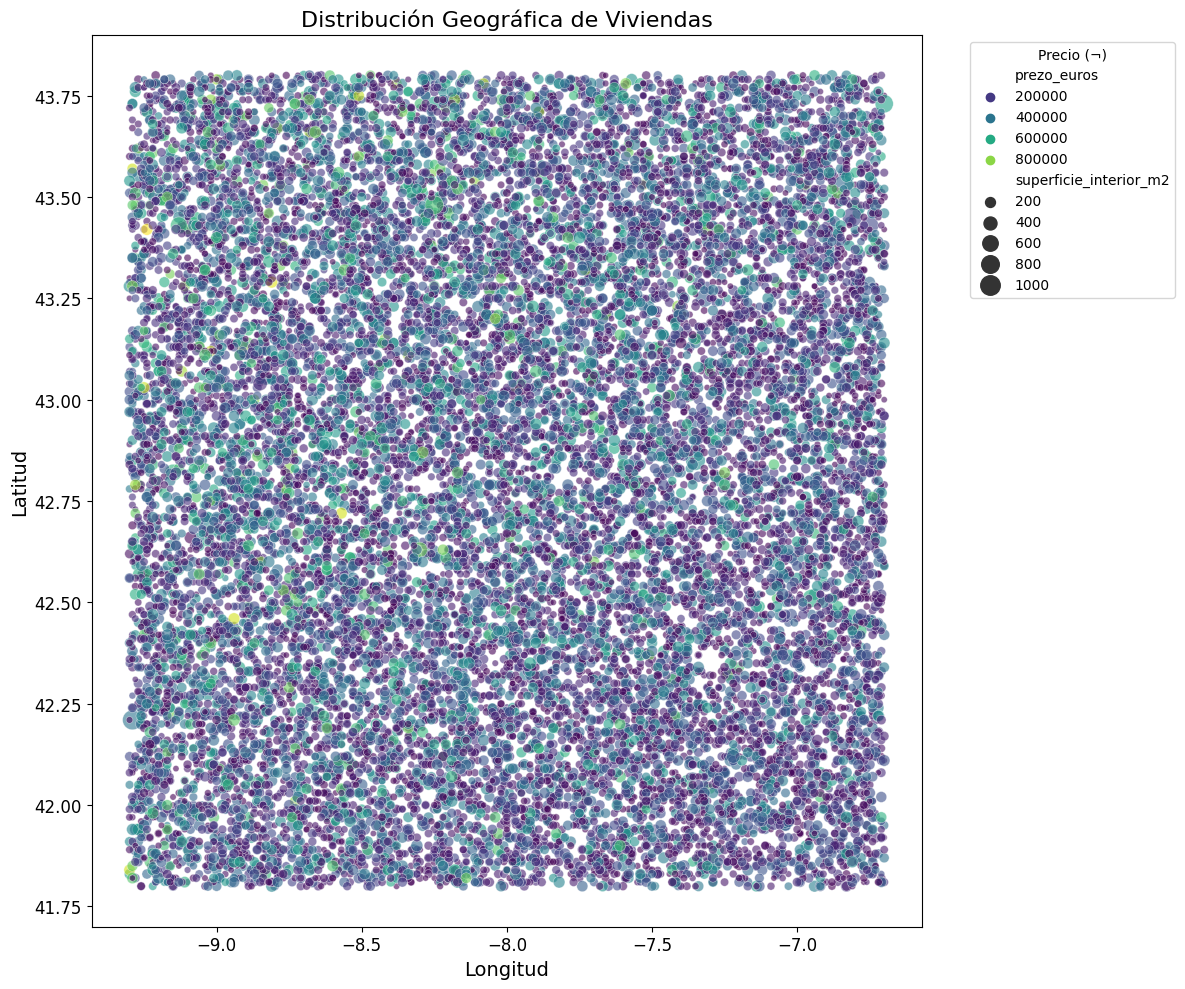

In [10]:
# =============================================================================
# 8. ANÁLISIS GEOESPACIAL
# =============================================================================

# Visualizar distribución geográfica de las viviendas
plt.figure(figsize=(12, 10))
sns.scatterplot(x='lonxitude', y='latitude', hue='prezo_euros', 
                size='superficie_interior_m2', data=train_data,
                palette='viridis', sizes=(20, 200), alpha=0.6)
plt.title('Distribución Geográfica de Viviendas', fontsize=16)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)
plt.legend(title='Precio (¬)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('distribucion_geografica.png')
plt.show()


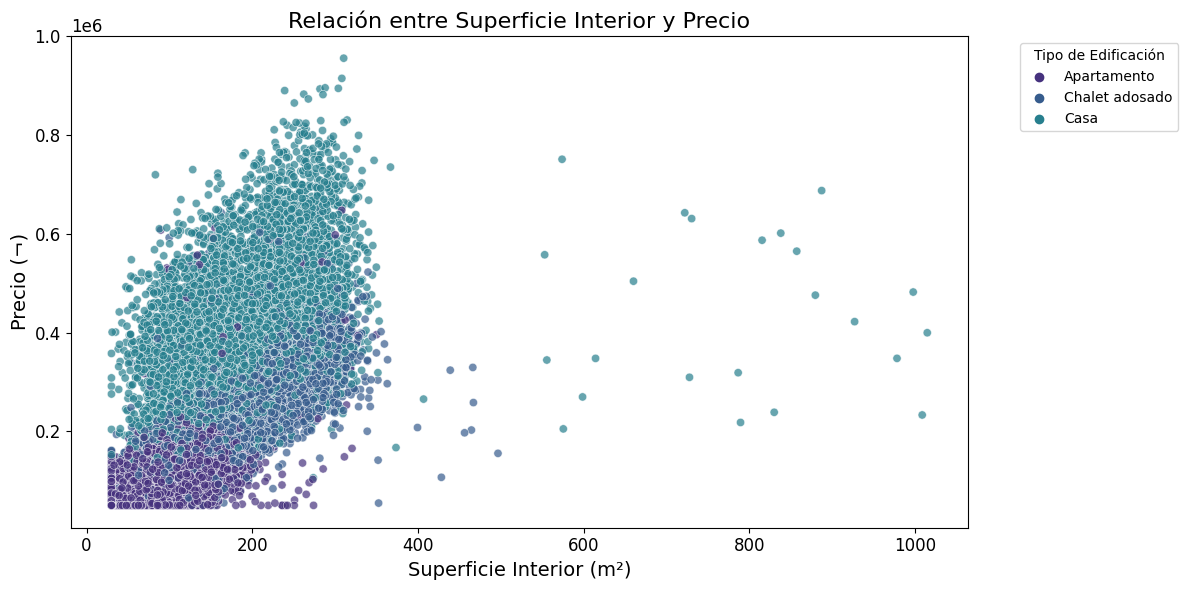

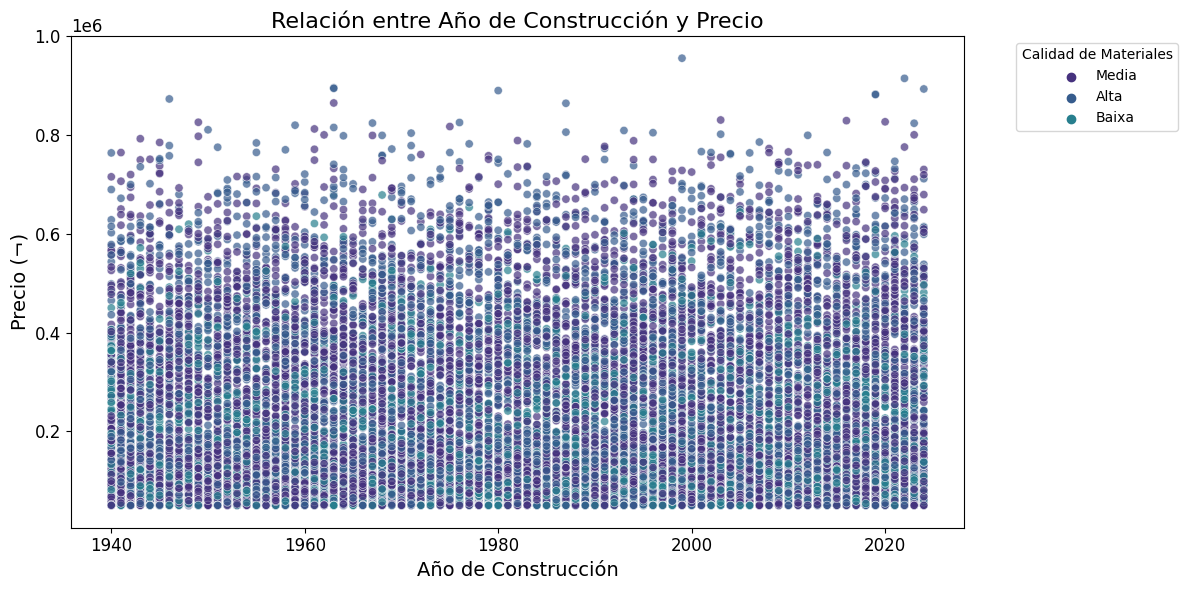

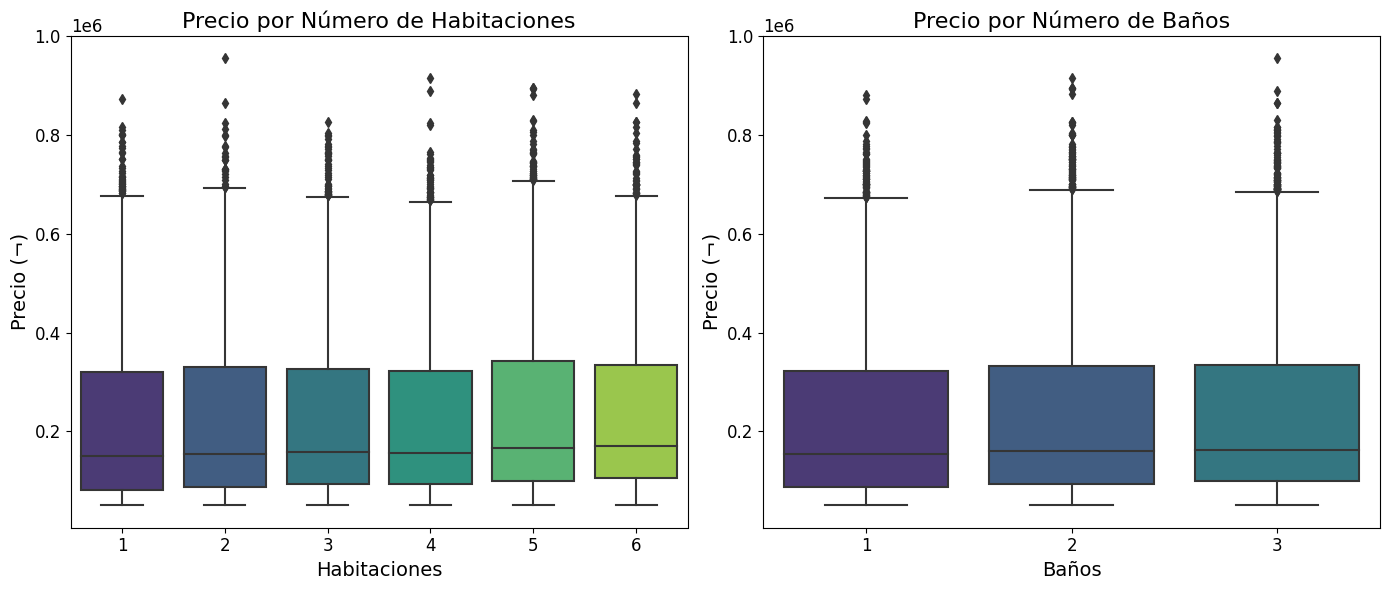

In [11]:
# =============================================================================
# 9. ANÁLISIS DE CARACTERÍSTICAS ESPECIALES
# =============================================================================

# Relación entre superficie interior y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='superficie_interior_m2', y='prezo_euros', 
                hue='tipo_edificacion', data=train_data, alpha=0.7)
plt.title('Relación entre Superficie Interior y Precio', fontsize=16)
plt.xlabel('Superficie Interior (m²)', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)
plt.legend(title='Tipo de Edificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('superficie_vs_precio.png')
plt.show()

# Relación entre año de construcción y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ano_construccion', y='prezo_euros', 
                hue='calidade_materiais', data=train_data, alpha=0.7)
plt.title('Relación entre Año de Construcción y Precio', fontsize=16)
plt.xlabel('Año de Construcción', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)
plt.legend(title='Calidad de Materiales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('ano_vs_precio.png')
plt.show()

# Relación entre número de habitaciones/baños y precio
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='numero_habitacions', y='prezo_euros', data=train_data)
plt.title('Precio por Número de Habitaciones', fontsize=16)
plt.xlabel('Habitaciones', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(x='numero_banos', y='prezo_euros', data=train_data)
plt.title('Precio por Número de Baños', fontsize=16)
plt.xlabel('Baños', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)
plt.tight_layout()
plt.savefig('habitaciones_banos_vs_precio.png')
plt.show()


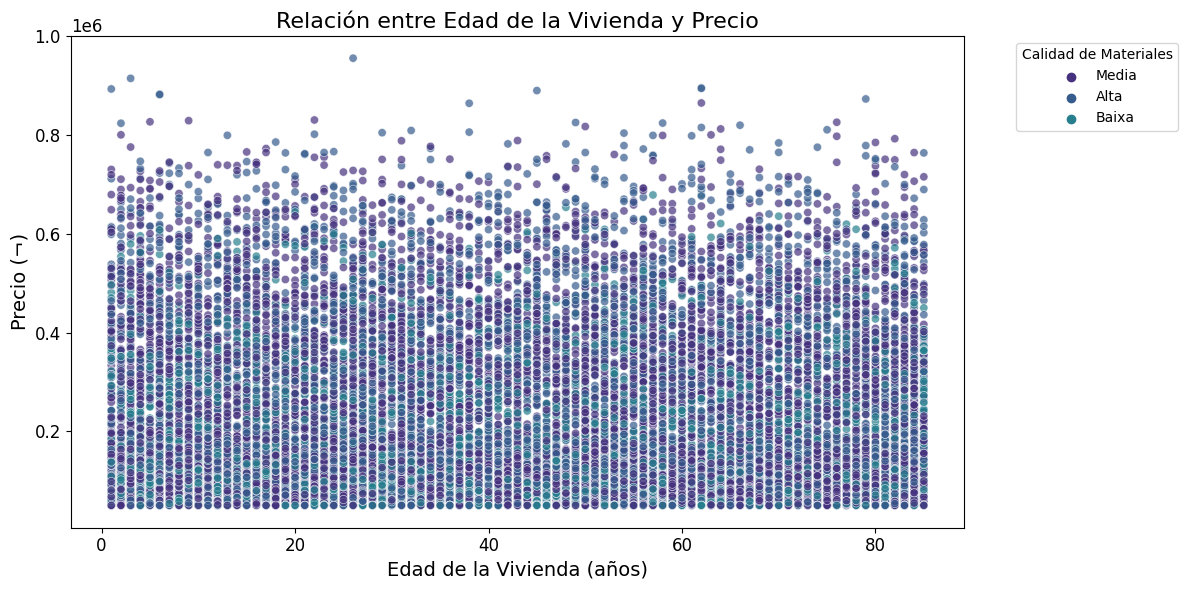

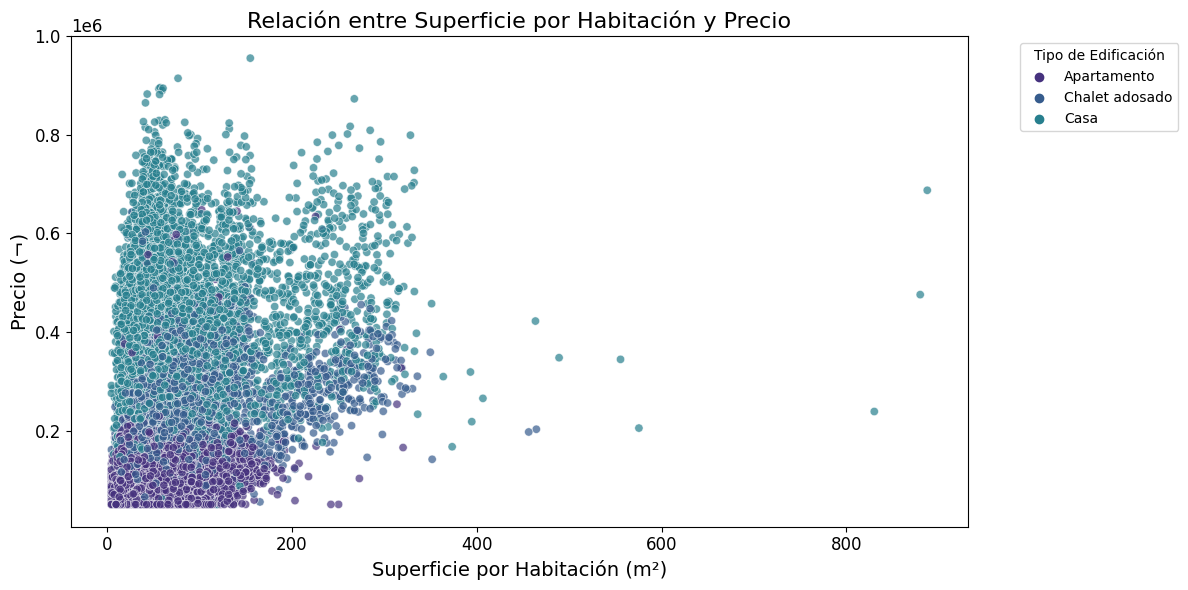

In [12]:
# =============================================================================
# 10. CREACIÓN DE CARACTERÍSTICAS ADICIONALES
# =============================================================================

# Añadir edad de la vivienda (año actual - año construcción)
current_year = 2025  # Año actual del problema
train_data['edad_vivienda'] = current_year - train_data['ano_construccion']

# Ratio superficie por habitación
train_data['superficie_por_habitacion'] = train_data['superficie_interior_m2'] / train_data['numero_habitacions']

# Relación entre edad de la vivienda y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='edad_vivienda', y='prezo_euros', 
                hue='calidade_materiais', data=train_data, alpha=0.7)
plt.title('Relación entre Edad de la Vivienda y Precio', fontsize=16)
plt.xlabel('Edad de la Vivienda (años)', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)
plt.legend(title='Calidad de Materiales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('edad_vs_precio.png')
plt.show()

# Relación entre superficie por habitación y precio
plt.figure(figsize=(12, 6))
sns.scatterplot(x='superficie_por_habitacion', y='prezo_euros', 
                hue='tipo_edificacion', data=train_data, alpha=0.7)
plt.title('Relación entre Superficie por Habitación y Precio', fontsize=16)
plt.xlabel('Superficie por Habitación (m²)', fontsize=14)
plt.ylabel('Precio (¬)', fontsize=14)
plt.legend(title='Tipo de Edificación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('superficie_por_habitacion_vs_precio.png')
plt.show()



Número de posibles outliers en precio: 238
Porcentaje de outliers: 1.19%


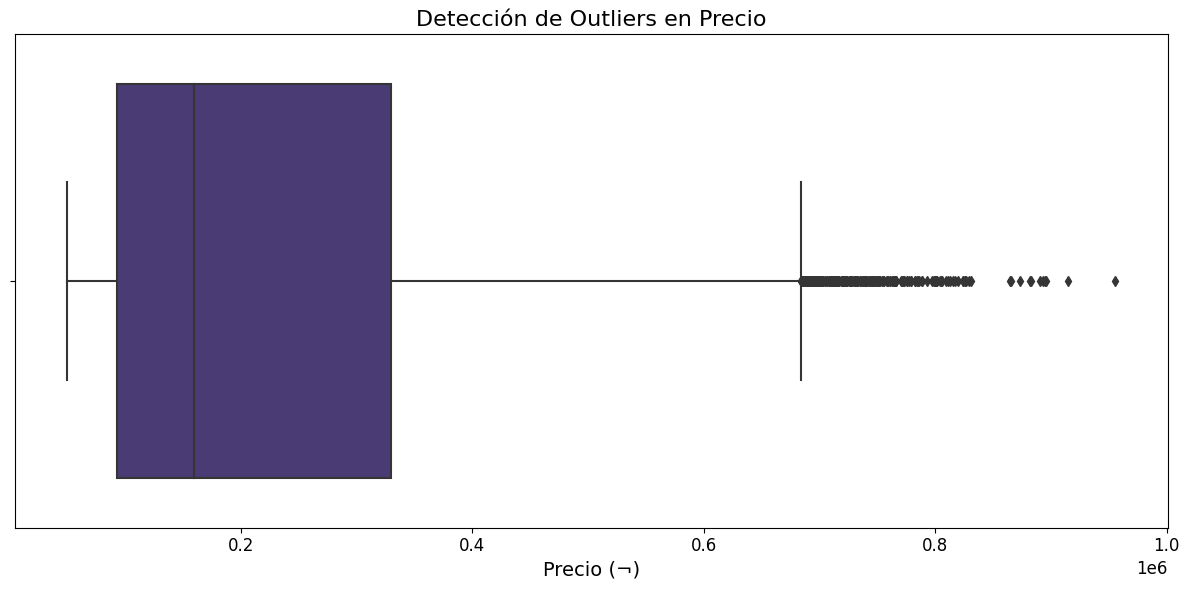

In [13]:
# =============================================================================
# 11. ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS)
# =============================================================================

# Detección de outliers en la variable objetivo
Q1 = train_data['prezo_euros'].quantile(0.25)
Q3 = train_data['prezo_euros'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_data[(train_data['prezo_euros'] < lower_bound) | 
                      (train_data['prezo_euros'] > upper_bound)]

print(f"\nNúmero de posibles outliers en precio: {len(outliers)}")
print(f"Porcentaje de outliers: {len(outliers) / len(train_data) * 100:.2f}%")

# Visualización de outliers en el precio
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['prezo_euros'])
plt.title('Detección de Outliers en Precio', fontsize=16)
plt.xlabel('Precio (¬)', fontsize=14)
plt.tight_layout()
plt.savefig('precio_outliers.png')
plt.show()

In [14]:
# =============================================================================
# 12. CONCLUSIONES Y RESUMEN
# =============================================================================

print("\n=== RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS ===")
print(f"1. Tamaño del conjunto de entrenamiento: {train_data.shape[0]} filas, {train_data.shape[1]} columnas")
print(f"2. Valores faltantes: {missing_df[missing_df['Missing Values'] > 0].shape[0]} columnas con valores faltantes")
print(f"3. Rango de precios: {train_data['prezo_euros'].min():.2f}¬ - {train_data['prezo_euros'].max():.2f}¬")
print(f"4. Precio medio: {train_data['prezo_euros'].mean():.2f}¬")
print(f"5. Variables con mayor correlación con el precio:")
for feature, corr in precio_correlations[:5].items():
    if feature != 'prezo_euros':
        print(f"   - {feature}: {corr:.4f}")

# Posibles pasos a seguir basados en el análisis
print("\nPasos a seguir basados en el análisis exploratorio:")
print("1. Imputar valores faltantes para superficie_interior_m2, superficie_exterior_m2 y distancia_centro_km")
print("2. Codificar variables categóricas (tipo_edificacion, calidade_materiais, etc.)")
print("3. Crear características adicionales (ratios, interacciones, features geoespaciales)")
print("4. Considerar transformación logarítmica de la variable objetivo para normalizar su distribución")
print("5. Evaluar el impacto de outliers en el modelado")


=== RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS ===
1. Tamaño del conjunto de entrenamiento: 20000 filas, 22 columnas
2. Valores faltantes: 5 columnas con valores faltantes
3. Rango de precios: 50000.00¬ - 955855.00¬
4. Precio medio: 223402.81¬
5. Variables con mayor correlación con el precio:
   - superficie_exterior_m2: 0.8295
   - superficie_interior_m2: 0.7058
   - numero_arboles_xardin: 0.5597
   - distancia_centro_km: 0.4938

Pasos a seguir basados en el análisis exploratorio:
1. Imputar valores faltantes para superficie_interior_m2, superficie_exterior_m2 y distancia_centro_km
2. Codificar variables categóricas (tipo_edificacion, calidade_materiais, etc.)
3. Crear características adicionales (ratios, interacciones, features geoespaciales)
4. Considerar transformación logarítmica de la variable objetivo para normalizar su distribución
5. Evaluar el impacto de outliers en el modelado
